In [1]:
# coding: utf-8
# 导入模块
import sys
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive,FloatSlider

from sklearn import cluster,datasets
from matplotlib.colors import ListedColormap
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import SGDClassifier, Perceptron

sys.path.append(r"C:\Users\zhang\Desktop\exeserise")
import mymodule as MYD

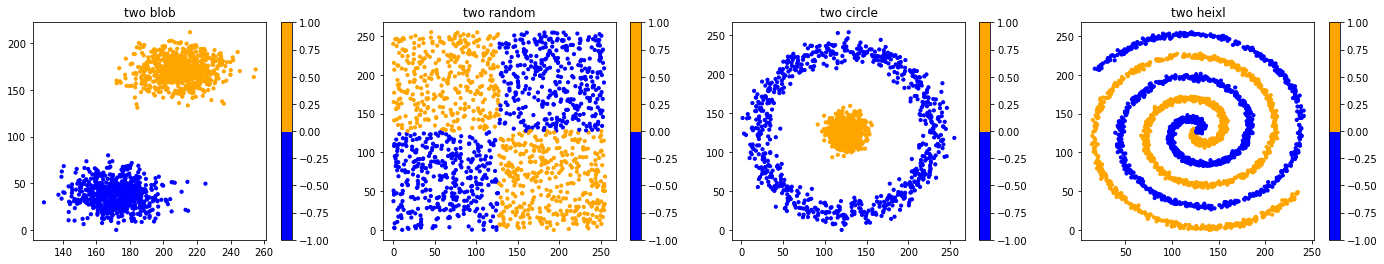

In [2]:
# # 四种数据集展示
n_samples=1500
XB,yb=MYD.makeblods(n_samples)
XR,yr=MYD.makerandoms(n_samples)
XC,yc=MYD.makecircles(n_samples)
XH,yh=MYD.makeHelixs(n_samples)
XAS = [XB, XR, XC,XH]
YAS=[yb,yr,yc,yh]

cor = ListedColormap(['Blue', 'Orange'])
titlename=['two blob','two random','two circle','two heixl']
cmap=[cor,cor,cor,cor]
MYD.DrawManyChart(XAS,YAS,cmap,24,4,titlename,10,1,4)


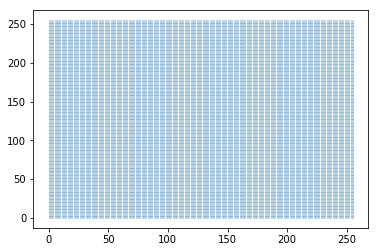

(65536,)

In [3]:
# # 测试数据集

# In[3]:

Xzip,points=MYD.makeGrids()
plt.figure()
plt.scatter(points[:,0],points[:,1],s=0.009)
plt.show()
np.random.shuffle(points)
points = np.array(points)
points[:,0].shape

C:\Users\zhang\Desktop\exeserise\mymodule.py:32: RuntimeWarning: invalid value encountered in true_divide
  x=(x-minx)/(maxX-minx)


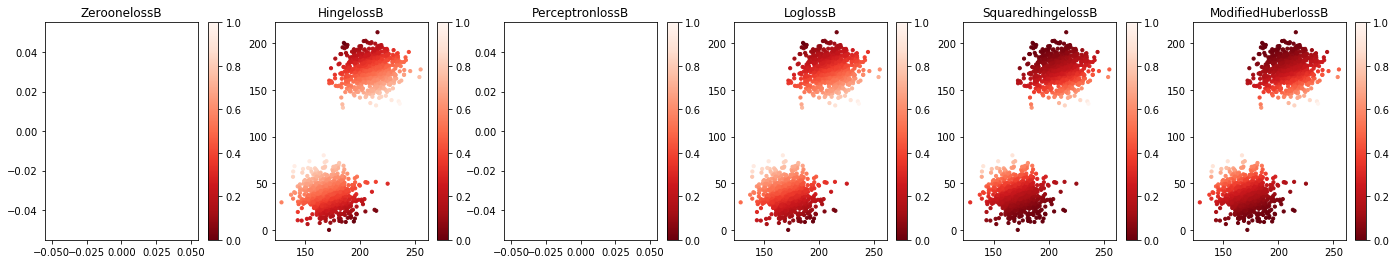

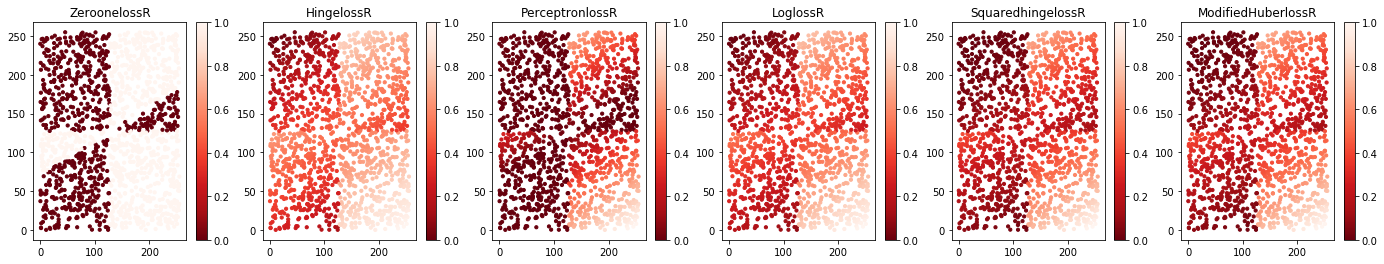

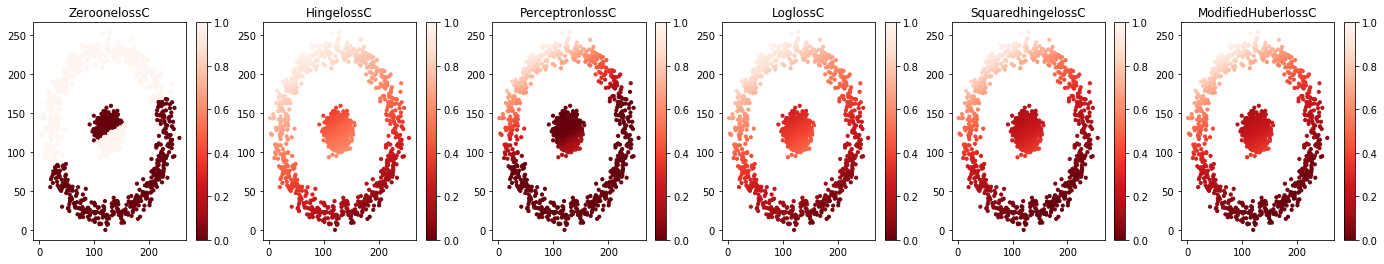

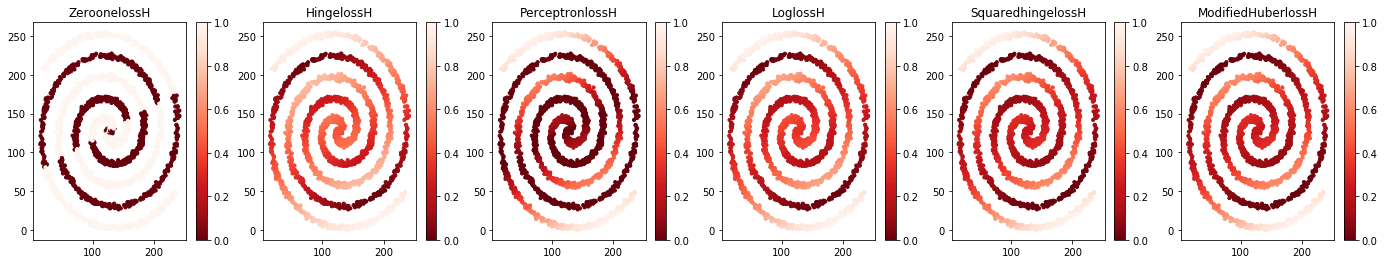

In [4]:
# # 训练样本的（归一化）损失值

# In[5]:

SGDclfB = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclfB.fit(XB, yb); 

SGDclfR = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclfR.fit(XR, yr); 

SGDclfC = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclfC.fit(XC, yc);

SGDclfH = SGDClassifier(loss="log", alpha=0.01, n_iter=200, fit_intercept=True)
SGDclfH.fit(XH, yh); 

GXB = SGDclfB.decision_function(XB); GXBNor=MYD.ZoomIn(GXB,1);
GXR = SGDclfB.decision_function(XR); GXRNor=MYD.ZoomIn(GXR,1);
GXC = SGDclfB.decision_function(XC); GXCNor=MYD.ZoomIn(GXC,1);
GXH = SGDclfB.decision_function(XH); GXHNor=MYD.ZoomIn(GXH,1);

HXB=np.array(MYD.MultiplyDW(GXBNor,yb)); HXR=np.array(MYD.MultiplyDW(GXRNor,yr));
HXC=np.array(MYD.MultiplyDW(GXCNor,yc)); HXH=np.array(MYD.MultiplyDW(GXHNor,yh));

ZeroonelossB,HingelossB,PerceptronlossB,LoglossB,SquaredhingelossB,ModifiedHuberlossB=MYD.lossfunction(HXB)
ZeroonelossR,HingelossR,PerceptronlossR,LoglossR,SquaredhingelossR,ModifiedHuberlossR=MYD.lossfunction(HXR)
ZeroonelossC,HingelossC,PerceptronlossC,LoglossC,SquaredhingelossC,ModifiedHuberlossC=MYD.lossfunction(HXC)
ZeroonelossH,HingelossH,PerceptronlossH,LoglossH,SquaredhingelossH,ModifiedHuberlossH=MYD.lossfunction(HXH)

cor=plt.cm.get_cmap('Reds_r');
XBB=[XB,XB,XB,XB,XB,XB];  XRR=[XR,XR,XR,XR,XR,XR];
XCC=[XC,XC,XC,XC,XC,XC];  XHH=[XH,XH,XH,XH,XH,XH];
YBB=[ZeroonelossB,HingelossB,PerceptronlossB,LoglossB,SquaredhingelossB,ModifiedHuberlossB]; 
YRR=[ZeroonelossR,HingelossR,PerceptronlossR,LoglossR,SquaredhingelossR,ModifiedHuberlossR];
YCC=[ZeroonelossC,HingelossC,PerceptronlossC,LoglossC,SquaredhingelossC,ModifiedHuberlossC];  
YHH=[ZeroonelossH,HingelossH,PerceptronlossH,LoglossH,SquaredhingelossH,ModifiedHuberlossH];
titlenameB=['ZeroonelossB','HingelossB','PerceptronlossB','LoglossB','SquaredhingelossB','ModifiedHuberlossB']
titlenameR=['ZeroonelossR','HingelossR','PerceptronlossR','LoglossR','SquaredhingelossR','ModifiedHuberlossR']
titlenameC=['ZeroonelossC','HingelossC','PerceptronlossC','LoglossC','SquaredhingelossC','ModifiedHuberlossC']
titlenameH=['ZeroonelossH','HingelossH','PerceptronlossH','LoglossH','SquaredhingelossH','ModifiedHuberlossH']
corbar=[cor,cor,cor,cor,cor,cor]
MYD.DrawManyChart(XBB,YBB,corbar,24,4,titlenameB,10,1,6)
MYD.DrawManyChart(XRR,YRR,corbar,24,4,titlenameR,10,1,6)
MYD.DrawManyChart(XCC,YCC,corbar,24,4,titlenameC,10,1,6)
MYD.DrawManyChart(XHH,YHH,corbar,24,4,titlenameH,10,1,6)

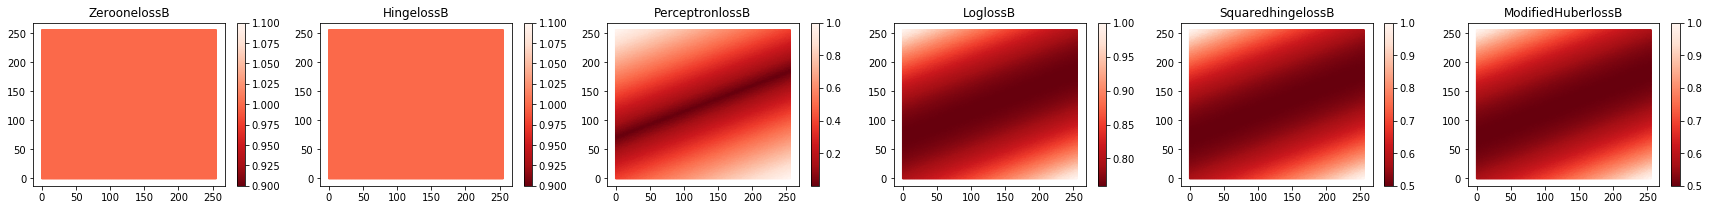

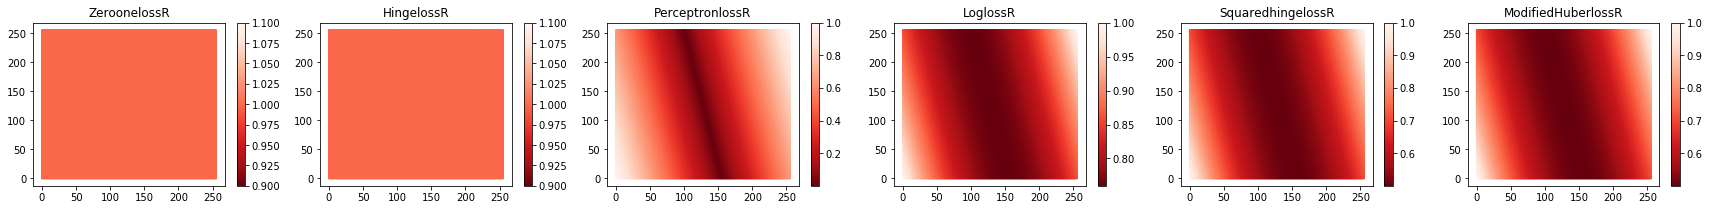

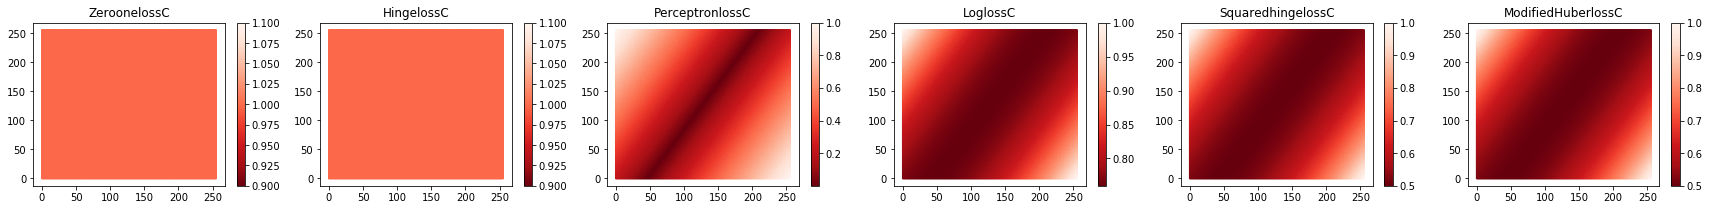

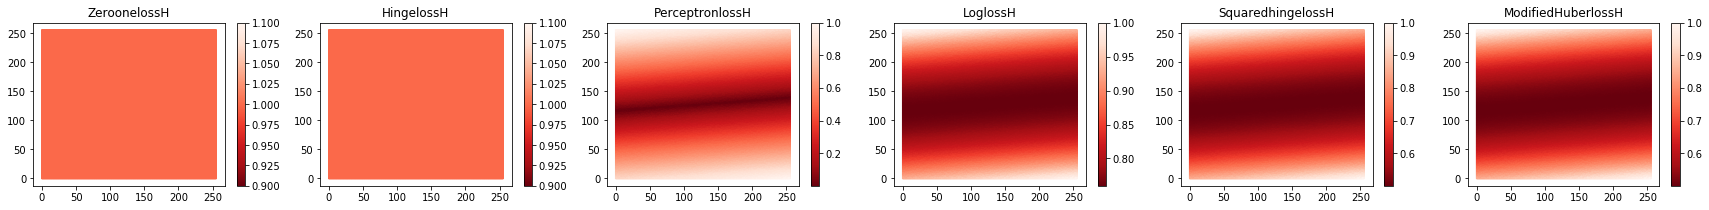

In [5]:
# #  假设测试样本损失值
TestGXB= SGDclfB.decision_function(points)
TestGXNorB=MYD.ZoomIn(TestGXB,1);
TestGXNorarrayB=np.array(TestGXNorB)

TestGXR= SGDclfR.decision_function(points)
TestGXNorR=MYD.ZoomIn(TestGXR,1);
TestGXNorarrayR=np.array(TestGXNorR)

TestGXC= SGDclfC.decision_function(points)
TestGXNorC=MYD.ZoomIn(TestGXC,1);
TestGXNorarrayC=np.array(TestGXNorC)

TestGXH= SGDclfH.decision_function(points)
TestGXNorH=MYD.ZoomIn(TestGXH,1);
TestGXNorarrayH=np.array(TestGXNorH)

ZeroonelossB,HingelossB,PerceptronlossB,LoglossB,SquaredhingelossB,ModifiedHuberlossB=MYD.lossfunction(TestGXNorarrayB)
ZeroonelossR,HingelossR,PerceptronlossR,LoglossR,SquaredhingelossR,ModifiedHuberlossR=MYD.lossfunction(TestGXNorarrayR)
ZeroonelossC,HingelossC,PerceptronlossC,LoglossC,SquaredhingelossC,ModifiedHuberlossC=MYD.lossfunction(TestGXNorarrayC)
ZeroonelossH,HingelossH,PerceptronlossH,LoglossH,SquaredhingelossH,ModifiedHuberlossH=MYD.lossfunction(TestGXNorarrayH)

FZeroonelossB,FHingelossB,FPerceptronlossB,FLoglossB,FSquaredhingelossB,FModifiedHuberlossB=MYD.lossfunction(-TestGXNorarrayB)
FZeroonelossR,FHingelossR,FPerceptronlossR,FLoglossR,FSquaredhingelossR,FModifiedHuberlossR=MYD.lossfunction(-TestGXNorarrayR)
FZeroonelossC,FHingelossC,FPerceptronlossC,FLoglossC,FSquaredhingelossC,FModifiedHuberlossC=MYD.lossfunction(-TestGXNorarrayC)
FZeroonelossH,FHingelossH,FPerceptronlossH,FLoglossH,FSquaredhingelossH,FModifiedHuberlossH=MYD.lossfunction(-TestGXNorarrayH)


ZeroonelossB=MYD.addarray(ZeroonelossB,FZeroonelossB); HingelossB=MYD.addarray(HingelossB,FHingelossB);
PerceptronlossB=MYD.addarray(PerceptronlossB,FPerceptronlossB); LoglossB=MYD.addarray(LoglossB,FLoglossB);
SquaredhingelossB=MYD.addarray(SquaredhingelossB,FSquaredhingelossB); ModifiedHuberlossB=MYD.addarray(ModifiedHuberlossB,FModifiedHuberlossB);

ZeroonelossR=MYD.addarray(ZeroonelossR,FZeroonelossR); HingelossR=MYD.addarray(HingelossR,FHingelossR);
PerceptronlossR=MYD.addarray(PerceptronlossR,FPerceptronlossR); LoglossR=MYD.addarray(LoglossR,FLoglossR);
SquaredhingelossR=MYD.addarray(SquaredhingelossR,FSquaredhingelossR);  ModifiedHuberlossR=MYD.addarray(ModifiedHuberlossR,FModifiedHuberlossR);

ZeroonelossC=MYD.addarray(ZeroonelossC,FZeroonelossC); HingelossC=MYD.addarray(HingelossC,FHingelossC);
PerceptronlossC=MYD.addarray(PerceptronlossC,FPerceptronlossC); LoglossC=MYD.addarray(LoglossC,FLoglossC);
SquaredhingelossC=MYD.addarray(SquaredhingelossC,FSquaredhingelossC);  ModifiedHuberlossC=MYD.addarray(ModifiedHuberlossC,FModifiedHuberlossC);

ZeroonelossH=MYD.addarray(ZeroonelossH,FZeroonelossH); HingelossH=MYD.addarray(HingelossH,FHingelossH);
PerceptronlossH=MYD.addarray(PerceptronlossH,FPerceptronlossH); LoglossH=MYD.addarray(LoglossH,FLoglossH);
SquaredhingelossH=MYD.addarray(SquaredhingelossH,FSquaredhingelossH);  ModifiedHuberlossH=MYD.addarray(ModifiedHuberlossH,FModifiedHuberlossH);


cor=plt.cm.get_cmap('Reds_r');
X=[points,points,points,points,points,points];  
YBB=[ZeroonelossB,HingelossB,PerceptronlossB,LoglossB,SquaredhingelossB,ModifiedHuberlossB]; 
YRR=[ZeroonelossR,HingelossR,PerceptronlossR,LoglossR,SquaredhingelossR,ModifiedHuberlossR];
YCC=[ZeroonelossC,HingelossC,PerceptronlossC,LoglossC,SquaredhingelossC,ModifiedHuberlossC]; 
YHH=[ZeroonelossH,HingelossH,PerceptronlossH,LoglossH,SquaredhingelossH,ModifiedHuberlossH];

MYD.DrawManyChart(X,YBB,corbar,30,3,titlenameB,1,1,6)
MYD.DrawManyChart(X,YRR,corbar,30,3,titlenameR,1,1,6)
MYD.DrawManyChart(X,YCC,corbar,30,3,titlenameC,1,1,6)
MYD.DrawManyChart(X,YHH,corbar,30,3,titlenameH,1,1,6)